In [1]:
#numpy                     1.15.2
#opencv                    3.4.3
#matplotlib                3.1.0
import numpy as np
import cv2

In [4]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


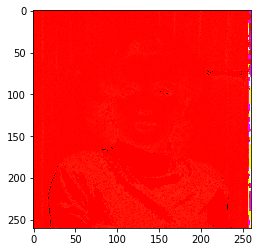

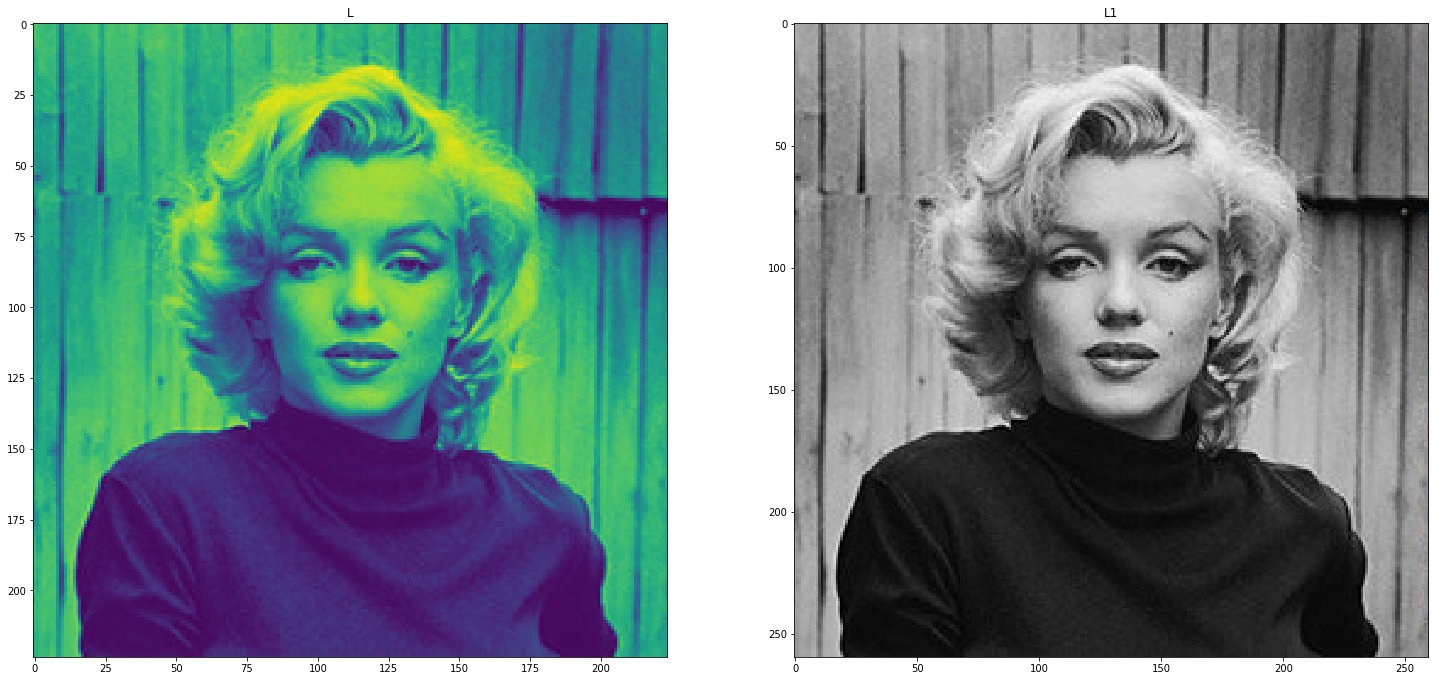

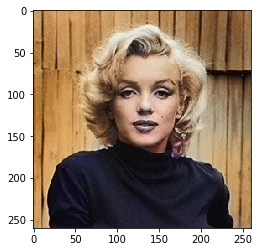

In [17]:
net = cv2.dnn.readNetFromCaffe("model/colorization_deploy_v2.prototxt", "model/colorization_release_v2.caffemodel")
pts = np.load("model/pts_in_hull.npy")

# add the cluster centers as 1x1 convolutions to the model
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

# load the input image from disk, scale the pixel intensities to the
# range [0, 1], and then convert the image from the BGR to Lab color space
image = cv2.imread("images/Monroe.jpg")
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)
plt.imshow(lab)
plt.show()

# resize the Lab image to 224x224 (the dimensions the colorization
# network accepts), split channels, extract the 'L' channel, and then
# perform mean centering
resized = cv2.resize(lab, (224, 224))
L1 = cv2.split(resized)[0]
L = L1 - 50

fig = plt.figure(figsize=(25,25))

fig.add_subplot(121)
plt.imshow(L)
plt.title('L')

fig.add_subplot(122)
plt.imshow(L1)
plt.title('L1')

net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

# resize the predicted 'ab' volume to the same dimensions as our input image
ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

# grab the 'L' channel from the *original* input image (not the resized one) and concatenate the original 'L' channel 
# with the predicted 'ab' channels
L = cv2.split(lab)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)
colorized1 = cv2.cvtColor(colorized, cv2.COLOR_LAB2RGB)
colorized2 = np.clip(colorized1, 0, 1)
colorized3 = (255 * colorized2).astype("uint8")
plt.imshow(image)
plt.show()

plt.imshow(colorized3)
plt.show()
#HSVimg = cv2.cvtColor(colorized3, cv2.COLOR_BGR2HSV)

### Testing HSV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

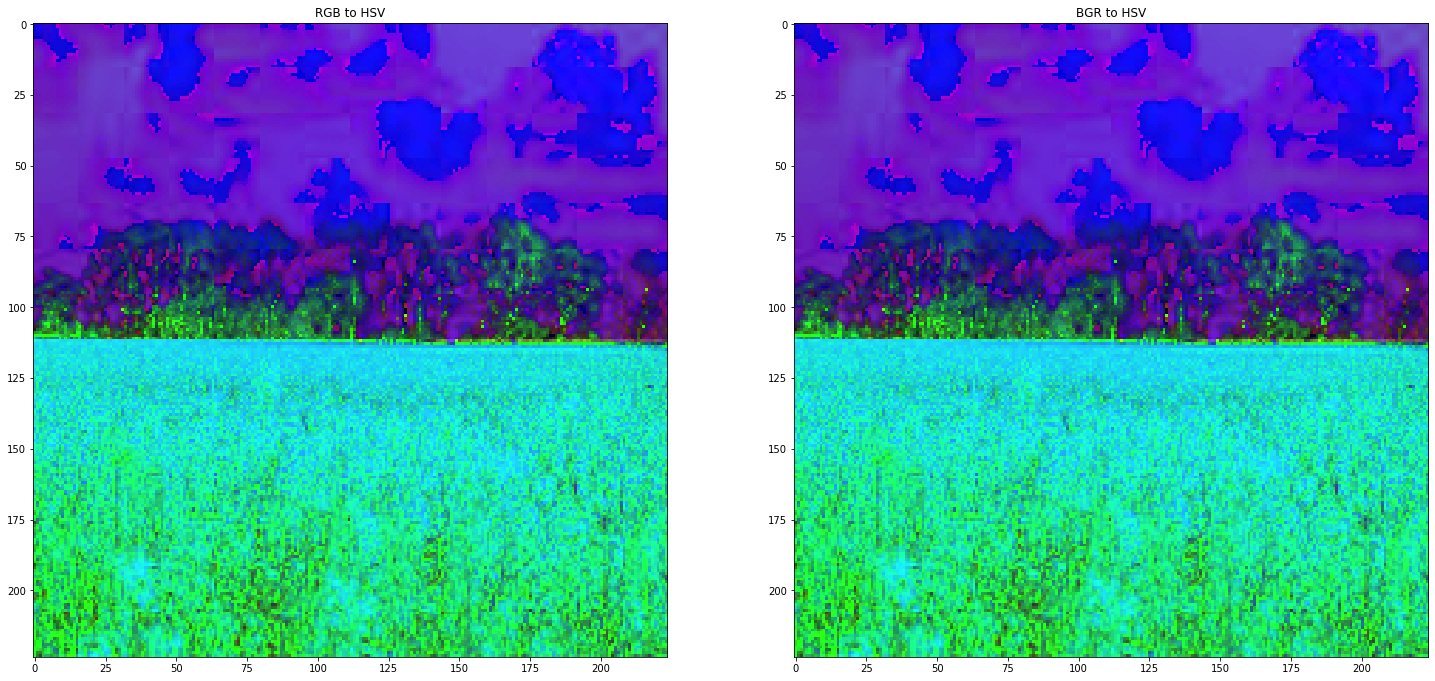

In [65]:
imgRGBHSV = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

imgBGRHSV = cv2.imread("truth_color_green.jpg")
imgBGRHSV = cv2.cvtColor(imgBGRHSV,cv2.COLOR_BGR2HSV)

fig2 = plt.figure(figsize=(25,25))

fig2.add_subplot(121)
plt.imshow(imgRGBHSV)
plt.title('RGB to HSV')


fig2.add_subplot(122)
plt.imshow(imgBGRHSV)
plt.title('BGR to HSV')

plt.show()

In [102]:
def Comparison_HSV(name):    
    image = cv2.imread(name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    nsize = 12
    
    imageFig = plt.figure(figsize=(nsize,nsize))
    imageFig.add_subplot(141)
    plt.imshow(image)
    plt.axis('off')
    imageFig.add_subplot(142)
    plt.imshow(image[:,:,0])
    plt.title('H')
    plt.axis('off')
    imageFig.add_subplot(143)
    plt.imshow(image[:,:,1])
    plt.title('S')
    plt.axis('off')
    imageFig.add_subplot(144)
    plt.imshow(image[:,:,2])
    plt.title('V')
    plt.axis('off')
    plt.show()

    imageFigGray = plt.figure(figsize=(nsize,nsize))
    imageFigGray.add_subplot(141)
    plt.imshow(image)
    plt.axis('off')
    imageFigGray.add_subplot(142)
    plt.imshow(image[:,:,0], cmap='gray')
    plt.title('H')
    plt.axis('off')
    imageFigGray.add_subplot(143)
    plt.imshow(image[:,:,1], cmap='gray')
    plt.title('S')
    plt.axis('off')
    imageFigGray.add_subplot(144)
    plt.imshow(image[:,:,2], cmap='gray')
    plt.title('V')
    plt.axis('off')
    plt.show()
    
    image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    imageFigRGB = plt.figure(figsize=(nsize,nsize))
    imgR = image.copy()
    imgR[:,:,1] = 0
    imgR[:,:,2] = 0

    imgG = image.copy()
    imgG[:,:,0] = 0
    imgG[:,:,2] = 0

    imgB = image.copy()
    imgB[:,:,0] = 0
    imgB[:,:,1] = 0

    imageFigRGB.add_subplot(141)
    plt.imshow(image)
    plt.axis('off')
    imageFigRGB.add_subplot(142)
    plt.imshow(imgR)
    plt.title('Red')
    plt.axis('off')
    imageFigRGB.add_subplot(143)
    plt.imshow(imgG)
    plt.title('Green')
    plt.axis('off')
    imageFigRGB.add_subplot(144)
    plt.imshow(imgB)
    plt.title('Blue')
    plt.axis('off')
    plt.show()

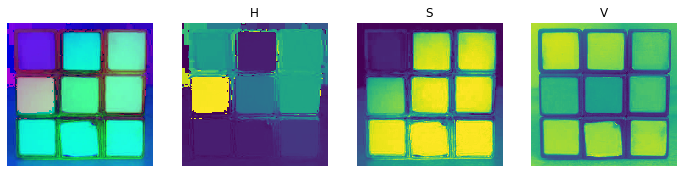

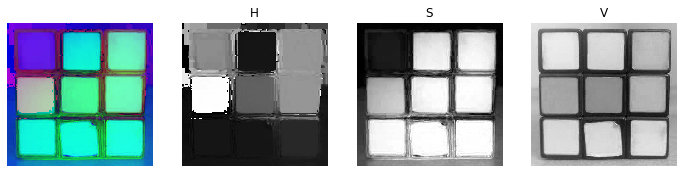

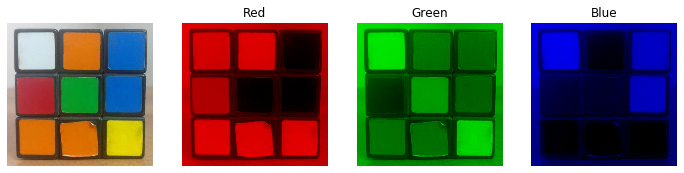

In [103]:
Comparison_HSV('rub.jpg')

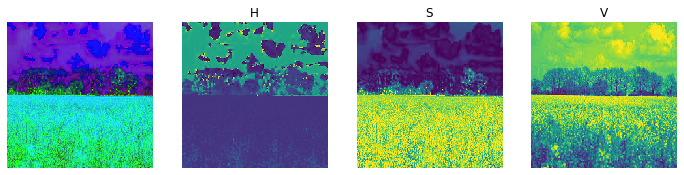

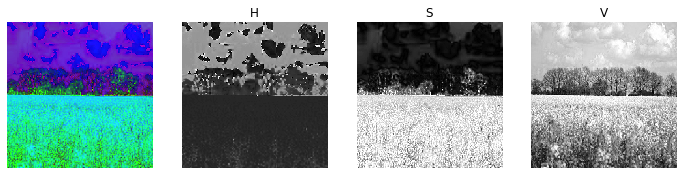

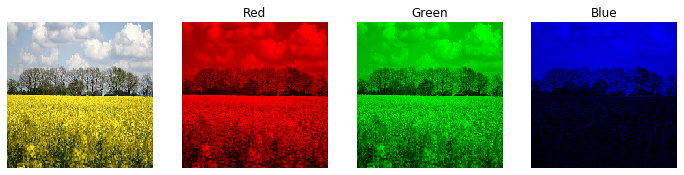

In [104]:
Comparison_HSV('truth_color_green.jpg')

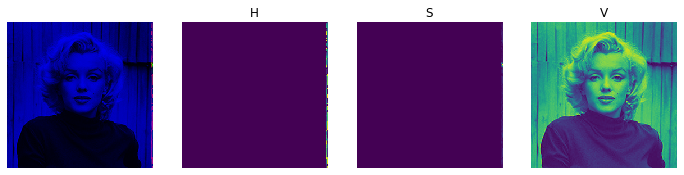

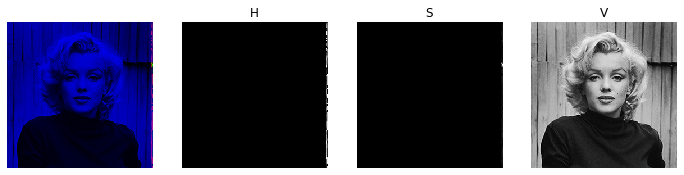

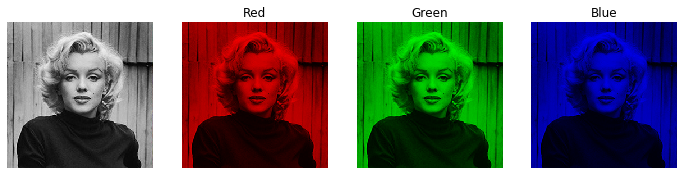

In [105]:
Comparison_HSV('images/Monroe.jpg')

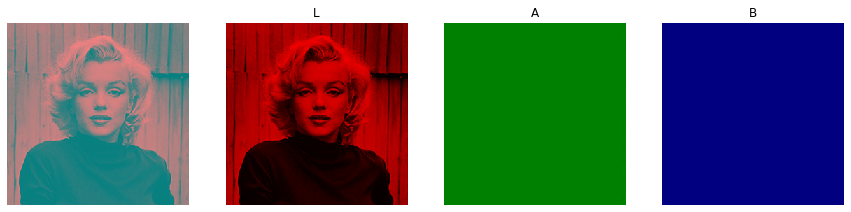

In [108]:
lab = cv2.imread('images/Monroe.jpg')
lab = cv2.cvtColor(lab, cv2.COLOR_BGR2LAB)

imageFigRGB = plt.figure(figsize=(15,15))
imgR = lab.copy()
imgR[:,:,1] = 0
imgR[:,:,2] = 0

imgG = lab.copy()
imgG[:,:,0] = 0
imgG[:,:,2] = 0

imgB = lab.copy()
imgB[:,:,0] = 0
imgB[:,:,1] = 0

imageFigRGB.add_subplot(141)
plt.imshow(lab)
plt.axis('off')
imageFigRGB.add_subplot(142)
plt.imshow(imgR)
plt.title('L')
plt.axis('off')
imageFigRGB.add_subplot(143)
plt.imshow(imgG)
plt.title('A')
plt.axis('off')
imageFigRGB.add_subplot(144)
plt.imshow(imgB)
plt.title('B')
plt.axis('off')

plt.show()